# Program

## Pre-processing Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, silhouette_score
from sklearn.pipeline import make_pipeline

# Load dataset
data = pd.read_csv('final_project.csv')

# Drop columns that are not useful for numeric analysis
data_cleaned = data.drop(columns=['image_url', 'url', 'title', 'location', 'shop_name', 'product_id'])

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in ['category', 'city', 'subcategory']:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Convert 'gold_merchant' from bool to int
data_cleaned['gold_merchant'] = data_cleaned['gold_merchant'].astype(int)

# Convert 'jumlah_view' to numeric
data_cleaned['jumlah_view'] = pd.to_numeric(data_cleaned['jumlah_view'], errors='coerce').fillna(0).astype(int)

# Define features and target
X = data_cleaned.drop(columns=['quantity_sold'])
y = data_cleaned['quantity_sold']

# Classification target: Convert quantity_sold to binary (sold or not sold)
y_classification = (y > 0).astype(int)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.3, random_state=42)

# Dictionary to store model performance
model_performance = {}

## Regression Model

In [ ]:
# Regression Models (Grid Search for RandomForest and SVR)

# Random Forest Regressor with Grid Search
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
rf_regressor = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf_regressor, rf_params, cv=3)
rf_grid.fit(X_train, y_train)
y_pred_rf = rf_grid.predict(X_test)
model_performance['Random Forest Regressor'] = {
    'Best Params': rf_grid.best_params_,
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

# SVR with Grid Search
svr_params = {'svr__C': [0.1, 1, 10], 'svr__kernel': ['linear', 'rbf']}
svr_model = make_pipeline(StandardScaler(), SVR())
svr_grid = GridSearchCV(svr_model, svr_params, cv=3)
svr_grid.fit(X_train, y_train)
y_pred_svr = svr_grid.predict(X_test)
model_performance['Support Vector Regressor'] = {
    'Best Params': svr_grid.best_params_,
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'R2': r2_score(y_test, y_pred_svr)
}

## Classification Model

In [ ]:
# Classification Models with Grid Search

# Random Forest Classifier with Grid Search
rf_clf_params = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
rf_classifier = RandomForestClassifier(random_state=42)
rf_clf_grid = GridSearchCV(rf_classifier, rf_clf_params, cv=3)
rf_clf_grid.fit(X_train_clf, y_train_clf)
y_pred_rf_clf = rf_clf_grid.predict(X_test_clf)
model_performance['Random Forest Classifier'] = {
    'Best Params': rf_clf_grid.best_params_,
    'Accuracy': accuracy_score(y_test_clf, y_pred_rf_clf)
}

# SVC with Grid Search
svc_params = {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}
svc_model = make_pipeline(StandardScaler(), SVC())
svc_grid = GridSearchCV(svc_model, svc_params, cv=3)
svc_grid.fit(X_train_clf, y_train_clf)
y_pred_svc = svc_grid.predict(X_test_clf)
model_performance['Support Vector Classifier'] = {
    'Best Params': svc_grid.best_params_,
    'Accuracy': accuracy_score(y_test_clf, y_pred_svc)
}

## Clustering Model

In [ ]:
# KMeans Clustering with different numbers of clusters
kmeans_params = {'n_clusters': [2, 3, 4, 5]}
best_kmeans = None
best_silhouette = -1

for n_clusters in kmeans_params['n_clusters']:
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_model.fit(X_train)
    cluster_labels = kmeans_model.predict(X_test)

    if n_clusters > 1:  # Silhouette score requires at least 2 clusters
        score = silhouette_score(X_test, cluster_labels)
        if score > best_silhouette:
            best_silhouette = score
            best_kmeans = kmeans_model

model_performance['KMeans Clustering'] = {
    'Best n_clusters': best_kmeans.n_clusters,
    'Silhouette Score': best_silhouette
}

## Output

In [ ]:
# Output the performance of each model
for model, metrics in model_performance.items():
    print(f"{model} Performance:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

Random Forest Regressor Performance:
  Best Params: {'max_depth': 10, 'n_estimators': 50}
  MSE: 37878.94017507875
  R2: 0.3271286295032112
Support Vector Regressor Performance:
  Best Params: {'svr__C': 10, 'svr__kernel': 'rbf'}
  MSE: 53003.746164141674
  R2: 0.058455617868781284
Random Forest Classifier Performance:
  Best Params: {'max_depth': 20, 'n_estimators': 200}
  Accuracy: 0.8238341968911918
Support Vector Classifier Performance:
  Best Params: {'svc__C': 1, 'svc__kernel': 'rbf'}
  Accuracy: 0.7927461139896373
KMeans Clustering Performance:
  Best n_clusters: 2
  Silhouette Score: 0.7079308029718081


## Visualisasi

Features with high correlation:
Series([], dtype: float64)


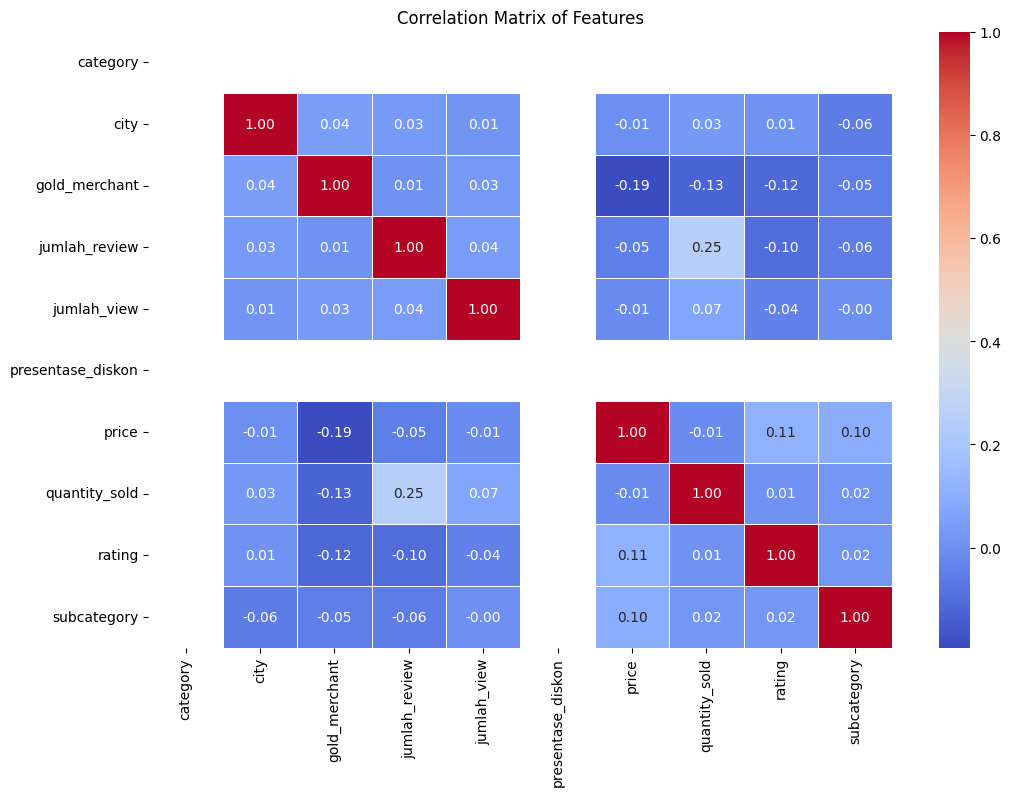

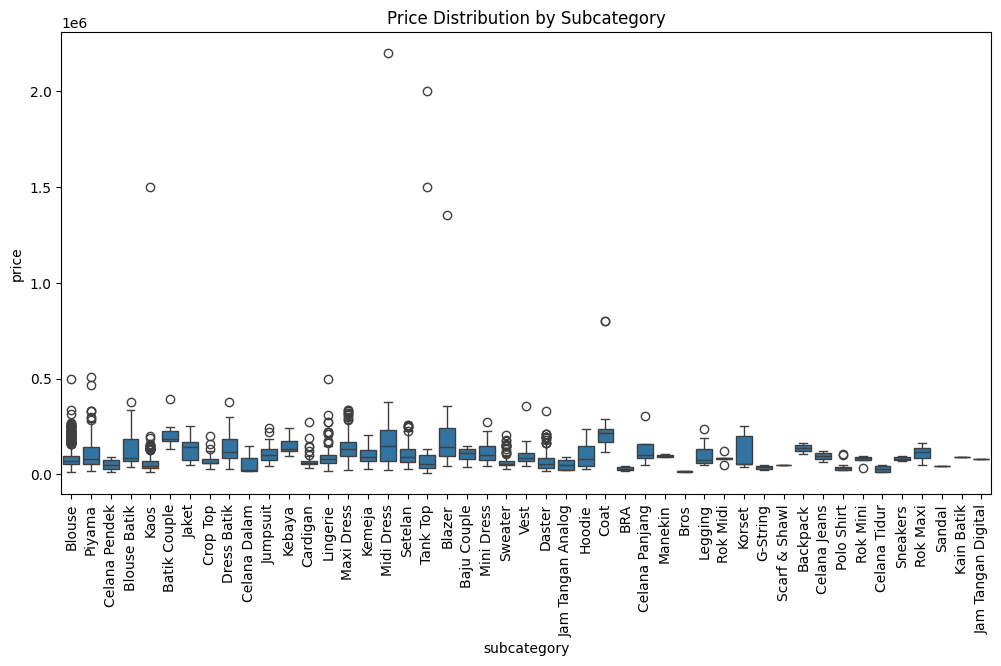

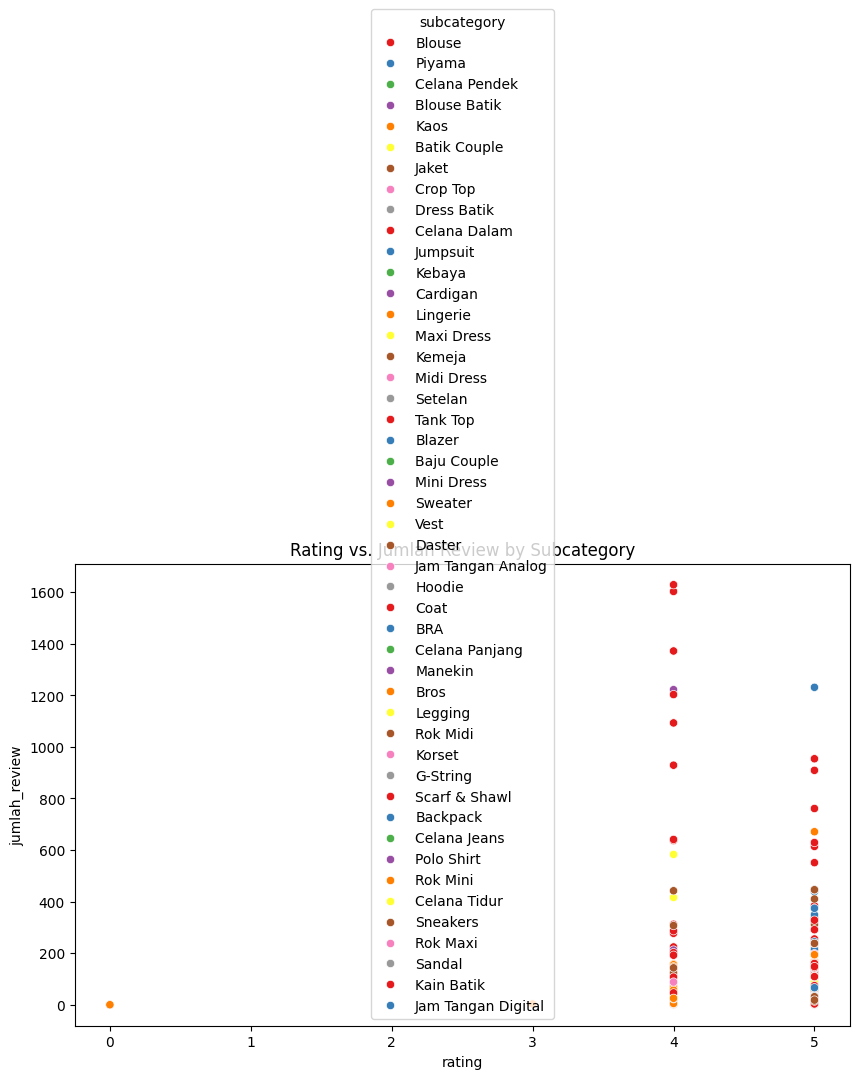

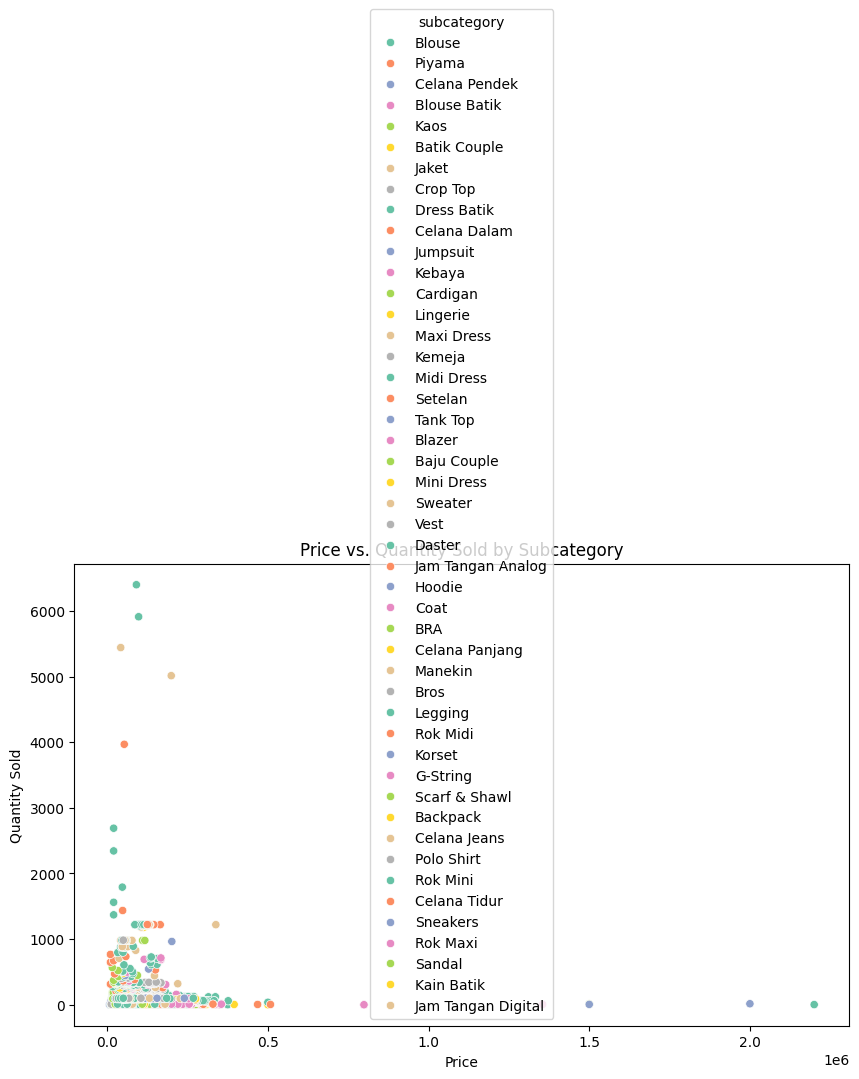

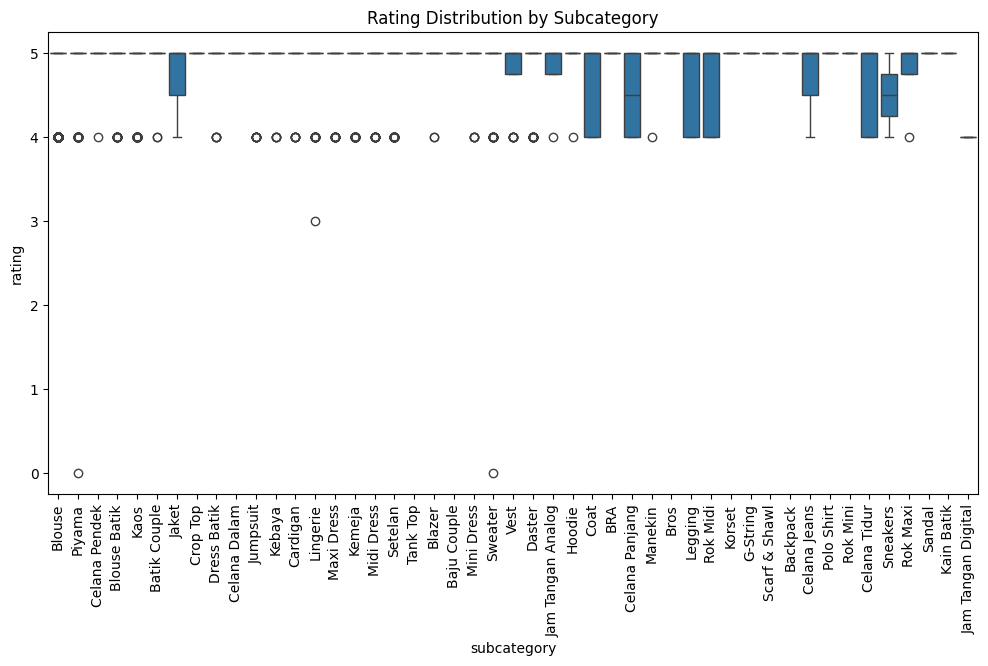

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = pd.read_csv('final_project.csv')

# Drop columns that are not useful for numeric analysis
data_cleaned = data.drop(columns=['image_url', 'url', 'title', 'location', 'shop_name', 'product_id'])

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in ['category', 'city', 'subcategory']:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Convert 'gold_merchant' from bool to int
data_cleaned['gold_merchant'] = data_cleaned['gold_merchant'].astype(int)

# Convert 'jumlah_view' to numeric
data_cleaned['jumlah_view'] = pd.to_numeric(data_cleaned['jumlah_view'], errors='coerce').fillna(0).astype(int)

# Check for missing values and fill them (if needed)
data_cleaned.fillna(0, inplace=True)

# Calculate correlation matrix
corr_matrix = data_cleaned.corr()

# Set a threshold for high correlation (e.g., 0.7)
high_corr_threshold = 0.7

# Find pairs of features with correlation higher than the threshold (excluding 1.0 diagonal)
high_corr_pairs = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
high_corr_pairs = high_corr_pairs[(high_corr_pairs != 1) & (abs(high_corr_pairs) >= high_corr_threshold)]

print("Features with high correlation:")
print(high_corr_pairs)

# Visualization of the correlation matrix (optional)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Distribution of Price per Subcategory
plt.figure(figsize=(12, 6))
sns.boxplot(x='subcategory', y='price', data=data)
plt.xticks(rotation=90)
plt.title('Price Distribution by Subcategory')
plt.show()

# Scatter Plot: Rating vs. Jumlah Review
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='jumlah_review', hue='subcategory', data=data, palette='Set1')
plt.title('Rating vs. Jumlah Review by Subcategory')
plt.show()

# Scatter Plot: Price vs. Quantity Sold (Profit Indicator)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='quantity_sold', hue='subcategory', data=data, palette='Set2')
plt.title('Price vs. Quantity Sold by Subcategory')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.show()

# Boxplot of Rating across Subcategories
plt.figure(figsize=(12, 6))
sns.boxplot(x='subcategory', y='rating', data=data)
plt.xticks(rotation=90)
plt.title('Rating Distribution by Subcategory')
plt.show()